In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hananlu/wikipedia/master/dataset/sampledata.csv', on_bad_lines='skip', header=None, sep='\t', encoding='latin-1')
df.head()

,0,1,2,3,4
0,929840853,1190146243326,http://upload.wikimedia.org/wikipedia/en/thumb...,-,NaN
1,929840856,1190146243321,http://en.wikipedia.org/images/wiki-en.png,-,NaN
2,929840854,1190146243311,http://upload.wikimedia.org/wikipedia/commons/...,-,NaN
3,929840855,1190146243301,http://es.wikipedia.org/w/index.php?title=-&ac...,-,NaN
4,929840857,1190146243303,http://en.wikipedia.org/w/index.php?title=Medi...,-,NaN


In [3]:
df.shape

(1036, 5)

In [4]:
df.drop(columns=4, inplace=True)

In [5]:
df.columns = ['monotonic', 'timestamp', 'url', 'flag']

In [6]:
df.head(2)

,monotonic,timestamp,url,flag
0,929840853,1190146243326,http://upload.wikimedia.org/wikipedia/en/thumb...,-
1,929840856,1190146243321,http://en.wikipedia.org/images/wiki-en.png,-


In [7]:
df.url.value_counts()[:1000]

http://upload.wikimedia.org/wikipedia/en/1/18/Monobook-bullet.png                                                                     19
http://en.wikipedia.org/w/index.php?title=MediaWiki:Common.css&usemsgcache=yes&action=raw&ctype=text/css&smaxage=2678400              17
http://en.wikipedia.org/skins-1.5/common/shared.css?99                                                                                15
http://meta.wikimedia.org/w/index.php?title=MediaWiki:Wikiminiatlas.js&action=raw&ctype=text/javascript&smaxage=21600&maxage=86400    15
http://en.wikipedia.org/w/index.php?title=-&action=raw&gen=js&useskin=monobook                                                        14
                                                                                                                                      ..
http://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Nuvola_apps_clock.png/23px-Nuvola_apps_clock.png                              1
http://upload.wikimedia.org/wikipedia/en/

In [8]:
df.duplicated().sum()

0

In [9]:
dataset = df.copy()

In [10]:
dataset.shape

(1036, 4)

In [11]:
# dataset.to_csv('./dataset/wikipedia_trace.csv', index=False)

In [12]:
# dataset = pd.read_csv('./dataset/wikipedia_trace.csv')
# dataset.head()

In [13]:
dataset.dtypes

monotonic     int64
timestamp     int64
url          object
flag         object
dtype: object

In [14]:
dataset.isnull().sum()

monotonic    0
timestamp    0
url          0
flag         0
dtype: int64

In [15]:
dataset.loc[:,'url'] = dataset.url.str.replace('//', '*')

In [16]:
dataset.head()

,monotonic,timestamp,url,flag
0,929840853,1190146243326,http:*upload.wikimedia.org/wikipedia/en/thumb/...,-
1,929840856,1190146243321,http:*en.wikipedia.org/images/wiki-en.png,-
2,929840854,1190146243311,http:*upload.wikimedia.org/wikipedia/commons/t...,-
3,929840855,1190146243301,http:*es.wikipedia.org/w/index.php?title=-&act...,-
4,929840857,1190146243303,http:*en.wikipedia.org/w/index.php?title=Media...,-


In [17]:
dataset[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']] = dataset.url.str.split('/', expand=True)

In [18]:
dataset.head()

,monotonic,timestamp,url,flag,a,b,c,d,e,f,g,h
0,929840853,1190146243326,http:*upload.wikimedia.org/wikipedia/en/thumb/...,-,http:*upload.wikimedia.org,wikipedia,en,thumb,e,e4,James_Johnson.jpg,200px-James_Johnson.jpg
1,929840856,1190146243321,http:*en.wikipedia.org/images/wiki-en.png,-,http:*en.wikipedia.org,images,wiki-en.png,None,None,None,None,None
2,929840854,1190146243311,http:*upload.wikimedia.org/wikipedia/commons/t...,-,http:*upload.wikimedia.org,wikipedia,commons,thumb,b,b9,Flag_of_Australia.svg,22px-Flag_of_Australia.svg.png
3,929840855,1190146243301,http:*es.wikipedia.org/w/index.php?title=-&act...,-,http:*es.wikipedia.org,w,index.php?title=-&action=raw&gen=js&useskin=mo...,None,None,None,None,None
4,929840857,1190146243303,http:*en.wikipedia.org/w/index.php?title=Media...,-,http:*en.wikipedia.org,w,index.php?title=MediaWiki:Monobook.css&usemsgc...,css&smaxage=2678400,None,None,None,None


In [19]:
dataset.url = dataset.url.str.replace('*', '//')

In [20]:
dataset.a = dataset.a.str.replace('*', '//')

In [21]:
dataset.head()

,monotonic,timestamp,url,flag,a,b,c,d,e,f,g,h
0,929840853,1190146243326,http://upload.wikimedia.org/wikipedia/en/thumb...,-,http://upload.wikimedia.org,wikipedia,en,thumb,e,e4,James_Johnson.jpg,200px-James_Johnson.jpg
1,929840856,1190146243321,http://en.wikipedia.org/images/wiki-en.png,-,http://en.wikipedia.org,images,wiki-en.png,None,None,None,None,None
2,929840854,1190146243311,http://upload.wikimedia.org/wikipedia/commons/...,-,http://upload.wikimedia.org,wikipedia,commons,thumb,b,b9,Flag_of_Australia.svg,22px-Flag_of_Australia.svg.png
3,929840855,1190146243301,http://es.wikipedia.org/w/index.php?title=-&ac...,-,http://es.wikipedia.org,w,index.php?title=-&action=raw&gen=js&useskin=mo...,None,None,None,None,None
4,929840857,1190146243303,http://en.wikipedia.org/w/index.php?title=Medi...,-,http://en.wikipedia.org,w,index.php?title=MediaWiki:Monobook.css&usemsgc...,css&smaxage=2678400,None,None,None,None


In [22]:
dataset.shape

(1036, 12)

In [23]:
dataset.rename(columns={'a':'prefix_1',
                       'b':'prefix_2',
                       'c':'prefix_3',
                       'd':'prefix_4',
                       'e':'prefix_5',
                       'f':'prefix_6',
                       'g':'prefix_7',
                       'h':'prefix_8'}, inplace=True)

In [24]:
dataset.head()

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,929840853,1190146243326,http://upload.wikimedia.org/wikipedia/en/thumb...,-,http://upload.wikimedia.org,wikipedia,en,thumb,e,e4,James_Johnson.jpg,200px-James_Johnson.jpg
1,929840856,1190146243321,http://en.wikipedia.org/images/wiki-en.png,-,http://en.wikipedia.org,images,wiki-en.png,None,None,None,None,None
2,929840854,1190146243311,http://upload.wikimedia.org/wikipedia/commons/...,-,http://upload.wikimedia.org,wikipedia,commons,thumb,b,b9,Flag_of_Australia.svg,22px-Flag_of_Australia.svg.png
3,929840855,1190146243301,http://es.wikipedia.org/w/index.php?title=-&ac...,-,http://es.wikipedia.org,w,index.php?title=-&action=raw&gen=js&useskin=mo...,None,None,None,None,None
4,929840857,1190146243303,http://en.wikipedia.org/w/index.php?title=Medi...,-,http://en.wikipedia.org,w,index.php?title=MediaWiki:Monobook.css&usemsgc...,css&smaxage=2678400,None,None,None,None


In [25]:
cek_data = dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']]

In [26]:
cek_data.shape

(1036, 8)

In [27]:
cek_data.head()

,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,http://upload.wikimedia.org,wikipedia,en,thumb,e,e4,James_Johnson.jpg,200px-James_Johnson.jpg
1,http://en.wikipedia.org,images,wiki-en.png,None,None,None,None,None
2,http://upload.wikimedia.org,wikipedia,commons,thumb,b,b9,Flag_of_Australia.svg,22px-Flag_of_Australia.svg.png
3,http://es.wikipedia.org,w,index.php?title=-&action=raw&gen=js&useskin=mo...,None,None,None,None,None
4,http://en.wikipedia.org,w,index.php?title=MediaWiki:Monobook.css&usemsgc...,css&smaxage=2678400,None,None,None,None


In [28]:
cek_data.prefix_2

0       wikipedia
1          images
2       wikipedia
3               w
4               w
          ...    
1031         wiki
1032    wikipedia
1033            w
1034         wiki
1035            w
Name: prefix_2, Length: 1036, dtype: object

In [29]:
prefix = list(cek_data.columns)

In [30]:
prefix

['prefix_1',
 'prefix_2',
 'prefix_3',
 'prefix_4',
 'prefix_5',
 'prefix_6',
 'prefix_7',
 'prefix_8']

In [31]:
cek_data.prefix_1.unique()

array(['http://upload.wikimedia.org', 'http://en.wikipedia.org',
       'http://es.wikipedia.org', 'http://pl.wikipedia.org',
       'http://de.wikipedia.org', 'http://en.wiktionary.org',
       'http://pt.wikipedia.org', 'http://hu.wikipedia.org',
       'http://ca.wikipedia.org', 'http://fr.wikipedia.org',
       'http://sv.wikipedia.org', 'http://fi.wikipedia.org',
       'http://it.wikipedia.org', 'http://meta.wikimedia.org',
       'http://www.wikipedia.com', 'http://hi.wikipedia.org',
       'http://ja.wikipedia.org', 'http://en.wikibooks.org',
       'http://www.wikipedia.org', 'http://war.wikipedia.org',
       'http://fr.wiktionary.org', 'http://sk.wikipedia.org',
       'http://no.wikipedia.org', 'http://it.wikiquote.org',
       'http://bn.wikipedia.org', 'http://et.wikipedia.org',
       'http://he.wikipedia.org', 'http://commons.wikimedia.org',
       'http://ar.wikipedia.org', 'http://nl.wikipedia.org',
       'http://de.wiktionary.org', 'http://wikimediafoundation.org',


In [32]:
for i in cek_data:
    print(i)
    print(f'Nama Preifix \n{cek_data[i].unique()[:5]}')
    print(cek_data[i].nunique())
    print()

prefix_1
Nama Preifix 
['http://upload.wikimedia.org' 'http://en.wikipedia.org'
 'http://es.wikipedia.org' 'http://pl.wikipedia.org'
 'http://de.wikipedia.org']
37

prefix_2
Nama Preifix 
['wikipedia' 'images' 'w' 'skins-1.5' 'wiki']
12

prefix_3
Nama Preifix 
['en' 'wiki-en.png' 'commons'
 'index.php?title=-&action=raw&gen=js&useskin=monobook'
 'index.php?title=MediaWiki:Monobook.css&usemsgcache=yes&action=raw&ctype=text']
167

prefix_4
Nama Preifix 
['thumb' None 'css&smaxage=2678400' 'IE60Fixes.css?99' 'images']
58

prefix_5
Nama Preifix 
['e' None 'b' '4' '9']
83

prefix_6
Nama Preifix 
['e4' None 'b9' '4a' '9a']
268

prefix_7
Nama Preifix 
['James_Johnson.jpg' None 'Flag_of_Australia.svg' 'Commons-logo.svg'
 'Flag_of_Spain.svg']
334

prefix_8
Nama Preifix 
['200px-James_Johnson.jpg' None '22px-Flag_of_Australia.svg.png'
 '50px-Commons-logo.svg.png' '20px-Flag_of_Spain.svg.png']
357



In [33]:
dic_prefix_1_key = list(cek_data.prefix_1.unique())

In [34]:
dic_prefix_1_key

['http://upload.wikimedia.org',
 'http://en.wikipedia.org',
 'http://es.wikipedia.org',
 'http://pl.wikipedia.org',
 'http://de.wikipedia.org',
 'http://en.wiktionary.org',
 'http://pt.wikipedia.org',
 'http://hu.wikipedia.org',
 'http://ca.wikipedia.org',
 'http://fr.wikipedia.org',
 'http://sv.wikipedia.org',
 'http://fi.wikipedia.org',
 'http://it.wikipedia.org',
 'http://meta.wikimedia.org',
 'http://www.wikipedia.com',
 'http://hi.wikipedia.org',
 'http://ja.wikipedia.org',
 'http://en.wikibooks.org',
 'http://www.wikipedia.org',
 'http://war.wikipedia.org',
 'http://fr.wiktionary.org',
 'http://sk.wikipedia.org',
 'http://no.wikipedia.org',
 'http://it.wikiquote.org',
 'http://bn.wikipedia.org',
 'http://et.wikipedia.org',
 'http://he.wikipedia.org',
 'http://commons.wikimedia.org',
 'http://ar.wikipedia.org',
 'http://nl.wikipedia.org',
 'http://de.wiktionary.org',
 'http://wikimediafoundation.org',
 'http://tr.wikipedia.org',
 'http://en.wikinews.org',
 'http://csb.wikipedia.or

In [35]:
dic_prefix_1_value = list(pd.Series(range(1,50)))

In [36]:
len(dic_prefix_1_key)

37

In [37]:
prefix_1_dictionary = dict(zip(dic_prefix_1_key, dic_prefix_1_value))

In [38]:
prefix_1_dictionary

{'http://upload.wikimedia.org': 1,
 'http://en.wikipedia.org': 2,
 'http://es.wikipedia.org': 3,
 'http://pl.wikipedia.org': 4,
 'http://de.wikipedia.org': 5,
 'http://en.wiktionary.org': 6,
 'http://pt.wikipedia.org': 7,
 'http://hu.wikipedia.org': 8,
 'http://ca.wikipedia.org': 9,
 'http://fr.wikipedia.org': 10,
 'http://sv.wikipedia.org': 11,
 'http://fi.wikipedia.org': 12,
 'http://it.wikipedia.org': 13,
 'http://meta.wikimedia.org': 14,
 'http://www.wikipedia.com': 15,
 'http://hi.wikipedia.org': 16,
 'http://ja.wikipedia.org': 17,
 'http://en.wikibooks.org': 18,
 'http://www.wikipedia.org': 19,
 'http://war.wikipedia.org': 20,
 'http://fr.wiktionary.org': 21,
 'http://sk.wikipedia.org': 22,
 'http://no.wikipedia.org': 23,
 'http://it.wikiquote.org': 24,
 'http://bn.wikipedia.org': 25,
 'http://et.wikipedia.org': 26,
 'http://he.wikipedia.org': 27,
 'http://commons.wikimedia.org': 28,
 'http://ar.wikipedia.org': 29,
 'http://nl.wikipedia.org': 30,
 'http://de.wiktionary.org': 31,


In [39]:
dataset.head()

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,929840853,1190146243326,http://upload.wikimedia.org/wikipedia/en/thumb...,-,http://upload.wikimedia.org,wikipedia,en,thumb,e,e4,James_Johnson.jpg,200px-James_Johnson.jpg
1,929840856,1190146243321,http://en.wikipedia.org/images/wiki-en.png,-,http://en.wikipedia.org,images,wiki-en.png,None,None,None,None,None
2,929840854,1190146243311,http://upload.wikimedia.org/wikipedia/commons/...,-,http://upload.wikimedia.org,wikipedia,commons,thumb,b,b9,Flag_of_Australia.svg,22px-Flag_of_Australia.svg.png
3,929840855,1190146243301,http://es.wikipedia.org/w/index.php?title=-&ac...,-,http://es.wikipedia.org,w,index.php?title=-&action=raw&gen=js&useskin=mo...,None,None,None,None,None
4,929840857,1190146243303,http://en.wikipedia.org/w/index.php?title=Medi...,-,http://en.wikipedia.org,w,index.php?title=MediaWiki:Monobook.css&usemsgc...,css&smaxage=2678400,None,None,None,None


In [40]:
dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']] = dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']].fillna(value='*edit*')

In [41]:
dataset.head()

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,929840853,1190146243326,http://upload.wikimedia.org/wikipedia/en/thumb...,-,http://upload.wikimedia.org,wikipedia,en,thumb,e,e4,James_Johnson.jpg,200px-James_Johnson.jpg
1,929840856,1190146243321,http://en.wikipedia.org/images/wiki-en.png,-,http://en.wikipedia.org,images,wiki-en.png,*edit*,*edit*,*edit*,*edit*,*edit*
2,929840854,1190146243311,http://upload.wikimedia.org/wikipedia/commons/...,-,http://upload.wikimedia.org,wikipedia,commons,thumb,b,b9,Flag_of_Australia.svg,22px-Flag_of_Australia.svg.png
3,929840855,1190146243301,http://es.wikipedia.org/w/index.php?title=-&ac...,-,http://es.wikipedia.org,w,index.php?title=-&action=raw&gen=js&useskin=mo...,*edit*,*edit*,*edit*,*edit*,*edit*
4,929840857,1190146243303,http://en.wikipedia.org/w/index.php?title=Medi...,-,http://en.wikipedia.org,w,index.php?title=MediaWiki:Monobook.css&usemsgc...,css&smaxage=2678400,*edit*,*edit*,*edit*,*edit*


In [42]:
dic_prefix_2_key = list(dataset.prefix_2.unique())

In [43]:
len(dic_prefix_2_key)

12

In [44]:
dic_prefix_2_value = list(pd.Series(range(1,21)))

In [45]:
prefix_2_dictionary = dict(zip(dic_prefix_2_key, dic_prefix_2_value))

In [46]:
print('*edit*' in dataset.prefix_1.values)
print('*edit*' in dataset.prefix_2.values)
print('*edit*' in dataset.prefix_3.values)
print('*edit*' in dataset.prefix_4.values)
print('*edit*' in dataset.prefix_5.values)
print('*edit*' in dataset.prefix_6.values)
print('*edit*' in dataset.prefix_7.values)
print('*edit*' in dataset.prefix_8.values)

False
False
True
True
True
True
True
True


In [47]:
dic_prefix_3_key = list(dataset.prefix_3.unique())

In [48]:
dic_prefix_3_key.remove('*edit*')

In [49]:
len(dic_prefix_3_key)

167

In [50]:
dic_prfix_3_value = list(pd.Series(range(1, 337)))

In [51]:
prefix_3_dictionary = dict(zip(dic_prefix_3_key, dic_prfix_3_value))

In [52]:
dic_prefix_4_key = list(dataset.prefix_4.unique())

In [53]:
dic_prefix_4_key.remove('*edit*')

In [54]:
len(dic_prefix_4_key)

58

In [55]:
dic_prefix_4_value = list(pd.Series(range(1,70)))

In [56]:
prefix_4_dictionary = dict(zip(dic_prefix_4_key, dic_prefix_4_value))

In [57]:
dic_prefix_5_key = list(dataset.prefix_5.unique())

In [58]:
dic_prefix_5_key.remove('*edit*')

In [59]:
len(dic_prefix_5_key)

83

In [60]:
dic_prefix_5_value = list(pd.Series(range(1, 112)))

In [61]:
prefix_5_dictionary = dict(zip(dic_prefix_5_key, dic_prefix_5_value))

In [62]:
dic_prefix_6_key = list(dataset.prefix_6.unique())

In [63]:
dic_prefix_6_key.remove('*edit*')

In [64]:
len(dic_prefix_6_key)

268

In [65]:
dic_prefix_6_value = list(pd.Series(range(1, 376)))

In [66]:
prefix_6_dictionary = dict(zip(dic_prefix_6_key, dic_prefix_6_value))

In [67]:
dic_prefix_7_key = list(dataset.prefix_7.unique())

In [68]:
dic_prefix_7_key.remove('*edit*')

In [69]:
len(dic_prefix_7_key)

334

In [70]:
dic_prefix_7_value = list(pd.Series(range(1, 609)))

In [71]:
prefix_7_dictionary = dict(zip(dic_prefix_7_key, dic_prefix_7_value))

In [72]:
dic_prefix_8_key = list(dataset.prefix_8.unique())

In [73]:
dic_prefix_8_key.remove('*edit*')

In [74]:
len(dic_prefix_8_key)

357

In [75]:
dic_prefix_8_value = list(pd.Series(range(1, 669)))

In [76]:
prefix_8_dictionary = dict(zip(dic_prefix_8_key, dic_prefix_8_value))

In [77]:
# dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']] = dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']].replace('*edit*', 0)

In [78]:
dataset['prefix_1'] = dataset['prefix_1'].map(prefix_1_dictionary)
dataset['prefix_2'] = dataset['prefix_2'].map(prefix_2_dictionary)
dataset['prefix_3'] = dataset['prefix_3'].map(prefix_3_dictionary)
dataset['prefix_4'] = dataset['prefix_4'].map(prefix_4_dictionary)
dataset['prefix_5'] = dataset['prefix_5'].map(prefix_5_dictionary)
dataset['prefix_6'] = dataset['prefix_6'].map(prefix_6_dictionary)
dataset['prefix_7'] = dataset['prefix_7'].map(prefix_7_dictionary)
dataset['prefix_8'] = dataset['prefix_8'].map(prefix_8_dictionary)

In [79]:
dataset.head(15)

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,929840853,1190146243326,http://upload.wikimedia.org/wikipedia/en/thumb...,-,1,1,1.0,1.0,1.0,1.0,1.0,1.0
1,929840856,1190146243321,http://en.wikipedia.org/images/wiki-en.png,-,2,2,2.0,NaN,NaN,NaN,NaN,NaN
2,929840854,1190146243311,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3.0,1.0,2.0,2.0,2.0,2.0
3,929840855,1190146243301,http://es.wikipedia.org/w/index.php?title=-&ac...,-,3,3,4.0,NaN,NaN,NaN,NaN,NaN
4,929840857,1190146243303,http://en.wikipedia.org/w/index.php?title=Medi...,-,2,3,5.0,2.0,NaN,NaN,NaN,NaN
5,929840858,1190146243314,http://upload.wikimedia.org/wikipedia/en/thumb...,-,1,1,1.0,1.0,3.0,3.0,3.0,3.0
6,929840860,1190146243325,http://en.wikipedia.org/skins-1.5/monobook/IE6...,-,2,4,6.0,3.0,NaN,NaN,NaN,NaN
7,929840859,1190146243296,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3.0,1.0,4.0,4.0,4.0,4.0
8,929840862,1190146243297,http://pl.wikipedia.org/skins-1.5/common/image...,-,4,4,7.0,4.0,5.0,NaN,NaN,NaN
9,929840861,1190146243292,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3.0,1.0,6.0,5.0,5.0,5.0


In [80]:
dataset.prefix_1.dtypes

dtype('int64')

In [81]:
dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']] = dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']].fillna(value=0)

In [82]:
dataset.head(15)

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,929840853,1190146243326,http://upload.wikimedia.org/wikipedia/en/thumb...,-,1,1,1.0,1.0,1.0,1.0,1.0,1.0
1,929840856,1190146243321,http://en.wikipedia.org/images/wiki-en.png,-,2,2,2.0,0.0,0.0,0.0,0.0,0.0
2,929840854,1190146243311,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3.0,1.0,2.0,2.0,2.0,2.0
3,929840855,1190146243301,http://es.wikipedia.org/w/index.php?title=-&ac...,-,3,3,4.0,0.0,0.0,0.0,0.0,0.0
4,929840857,1190146243303,http://en.wikipedia.org/w/index.php?title=Medi...,-,2,3,5.0,2.0,0.0,0.0,0.0,0.0
5,929840858,1190146243314,http://upload.wikimedia.org/wikipedia/en/thumb...,-,1,1,1.0,1.0,3.0,3.0,3.0,3.0
6,929840860,1190146243325,http://en.wikipedia.org/skins-1.5/monobook/IE6...,-,2,4,6.0,3.0,0.0,0.0,0.0,0.0
7,929840859,1190146243296,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3.0,1.0,4.0,4.0,4.0,4.0
8,929840862,1190146243297,http://pl.wikipedia.org/skins-1.5/common/image...,-,4,4,7.0,4.0,5.0,0.0,0.0,0.0
9,929840861,1190146243292,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3.0,1.0,6.0,5.0,5.0,5.0


In [83]:
dataset[['prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']] = dataset[['prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']].astype('int64')

In [84]:
dataset.tail(10)

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
1026,929841879,1190146243636,http://upload.wikimedia.org/wikipedia/en/thumb...,-,1,1,1,1,2,215,331,353
1027,929841880,1190146243628,http://en.wikipedia.org/w/index.php?title=-&ac...,-,2,3,4,0,0,0,0,0
1028,929841881,1190146243635,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3,1,4,176,263,354
1029,929841882,1190146243645,http://upload.wikimedia.org/wikipedia/en/thumb...,-,1,1,1,1,6,5,332,355
1030,929841883,1190146243658,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3,1,13,86,333,356
1031,929841885,119014624366,http://en.wikipedia.org/wiki/Florence_Nightingale,-,2,5,165,0,0,0,0,0
1032,929841884,1190146243652,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3,1,16,38,334,357
1033,929841887,1190146243628,http://commons.wikimedia.org/w/index.php?title...,-,28,3,166,32,0,0,0,0
1034,929841890,1190146243655,http://en.wikipedia.org/wiki/List_of_The_4400_...,-,2,5,167,0,0,0,0,0
1035,929841892,1190146243656,http://meta.wikimedia.org/w/index.php?title=Me...,-,14,3,22,19,0,0,0,0


In [85]:
dataset.shape

(1036, 12)

In [86]:
dataset.isnull().sum()

monotonic    0
timestamp    0
url          0
flag         0
prefix_1     0
prefix_2     0
prefix_3     0
prefix_4     0
prefix_5     0
prefix_6     0
prefix_7     0
prefix_8     0
dtype: int64

In [87]:
dataset.dtypes

monotonic     int64
timestamp     int64
url          object
flag         object
prefix_1      int64
prefix_2      int64
prefix_3      int64
prefix_4      int64
prefix_5      int64
prefix_6      int64
prefix_7      int64
prefix_8      int64
dtype: object

In [88]:
dataset['count'] = dataset.groupby(by=['url'])['url'].transform('count')

In [89]:
dataset.head()

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,count
0,929840853,1190146243326,http://upload.wikimedia.org/wikipedia/en/thumb...,-,1,1,1,1,1,1,1,1,1
1,929840856,1190146243321,http://en.wikipedia.org/images/wiki-en.png,-,2,2,2,0,0,0,0,0,10
2,929840854,1190146243311,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3,1,2,2,2,2,1
3,929840855,1190146243301,http://es.wikipedia.org/w/index.php?title=-&ac...,-,3,3,4,0,0,0,0,0,3
4,929840857,1190146243303,http://en.wikipedia.org/w/index.php?title=Medi...,-,2,3,5,2,0,0,0,0,12


In [90]:
dataset.sort_values(by='count', ascending=False)

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,count
518,929841370,1190146243483,http://upload.wikimedia.org/wikipedia/en/1/18/...,-,1,1,1,16,22,34,0,0,19
507,929841361,1190146243482,http://upload.wikimedia.org/wikipedia/en/1/18/...,-,1,1,1,16,22,34,0,0,19
698,929841550,1190146243541,http://upload.wikimedia.org/wikipedia/en/1/18/...,-,1,1,1,16,22,34,0,0,19
338,929841190,1190146243429,http://upload.wikimedia.org/wikipedia/en/1/18/...,-,1,1,1,16,22,34,0,0,19
208,929841061,1190146243388,http://upload.wikimedia.org/wikipedia/en/1/18/...,-,1,1,1,16,22,34,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,929841321,1190146243455,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3,1,13,26,165,172,1
470,929841323,1190146243454,http://nl.wikipedia.org/skins-1.5/monobook/mai...,-,30,4,6,9,0,0,0,0,1
471,929841324,119014624347,http://upload.wikimedia.org/wikipedia/en/d/d5/...,-,1,1,1,7,48,152,0,0,1
472,929841325,1190146243467,http://upload.wikimedia.org/wikipedia/en/thumb...,-,1,1,1,1,24,153,166,173,1


In [91]:
dataset.drop(columns=['monotonic', 'timestamp', 'flag'], inplace=True)

In [92]:
dataset.head()

,url,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,count
0,http://upload.wikimedia.org/wikipedia/en/thumb...,1,1,1,1,1,1,1,1,1
1,http://en.wikipedia.org/images/wiki-en.png,2,2,2,0,0,0,0,0,10
2,http://upload.wikimedia.org/wikipedia/commons/...,1,1,3,1,2,2,2,2,1
3,http://es.wikipedia.org/w/index.php?title=-&ac...,3,3,4,0,0,0,0,0,3
4,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,5,2,0,0,0,0,12


In [93]:
dataset.duplicated().sum()

281

In [94]:
len(dataset)

1036

In [95]:
print(len(dataset) - dataset.duplicated().sum())

755


In [96]:
dataset.rename(columns={'count': 'popularity'}, inplace=True)

In [97]:
dataset

,url,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,popularity
0,http://upload.wikimedia.org/wikipedia/en/thumb...,1,1,1,1,1,1,1,1,1
1,http://en.wikipedia.org/images/wiki-en.png,2,2,2,0,0,0,0,0,10
2,http://upload.wikimedia.org/wikipedia/commons/...,1,1,3,1,2,2,2,2,1
3,http://es.wikipedia.org/w/index.php?title=-&ac...,3,3,4,0,0,0,0,0,3
4,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,5,2,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...
1031,http://en.wikipedia.org/wiki/Florence_Nightingale,2,5,165,0,0,0,0,0,1
1032,http://upload.wikimedia.org/wikipedia/commons/...,1,1,3,1,16,38,334,357,1
1033,http://commons.wikimedia.org/w/index.php?title...,28,3,166,32,0,0,0,0,1
1034,http://en.wikipedia.org/wiki/List_of_The_4400_...,2,5,167,0,0,0,0,0,1


In [98]:
dataset.popularity.max()

19

In [99]:
dataset.shape

(1036, 10)

In [100]:
dataset.drop_duplicates(inplace=True)

In [101]:
dataset.duplicated().sum()

0

In [102]:
dataset.sort_values(by='popularity', ascending=False)[:20]

,url,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,popularity
86,http://upload.wikimedia.org/wikipedia/en/1/18/...,1,1,1,16,22,34,0,0,19
46,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,13,2,0,0,0,0,17
35,http://en.wikipedia.org/skins-1.5/common/share...,2,4,7,11,0,0,0,0,15
78,http://meta.wikimedia.org/w/index.php?title=Me...,14,3,22,19,0,0,0,0,15
127,http://en.wikipedia.org/w/index.php?title=-&ac...,2,3,4,0,0,0,0,0,14
4,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,5,2,0,0,0,0,12
157,http://en.wikipedia.org/skins-1.5/common/commo...,2,4,7,5,0,0,0,0,10
1,http://en.wikipedia.org/images/wiki-en.png,2,2,2,0,0,0,0,0,10
101,http://en.wikipedia.org/w/index.php?title=-&ac...,2,3,12,0,0,0,0,0,10
88,http://en.wikipedia.org/skins-1.5/monobook/use...,2,4,6,13,0,0,0,0,9


In [103]:
dataset[dataset['popularity'] >= 5].sort_values(by='popularity', ascending=False)

,url,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,popularity
86,http://upload.wikimedia.org/wikipedia/en/1/18/...,1,1,1,16,22,34,0,0,19
46,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,13,2,0,0,0,0,17
78,http://meta.wikimedia.org/w/index.php?title=Me...,14,3,22,19,0,0,0,0,15
35,http://en.wikipedia.org/skins-1.5/common/share...,2,4,7,11,0,0,0,0,15
127,http://en.wikipedia.org/w/index.php?title=-&ac...,2,3,4,0,0,0,0,0,14
4,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,5,2,0,0,0,0,12
1,http://en.wikipedia.org/images/wiki-en.png,2,2,2,0,0,0,0,0,10
157,http://en.wikipedia.org/skins-1.5/common/commo...,2,4,7,5,0,0,0,0,10
101,http://en.wikipedia.org/w/index.php?title=-&ac...,2,3,12,0,0,0,0,0,10
88,http://en.wikipedia.org/skins-1.5/monobook/use...,2,4,6,13,0,0,0,0,9


In [104]:
dataset['popularity'] = dataset['popularity'].apply(lambda x: 1 if x >= 5 else 0)

In [105]:
dataset.head()

,url,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,popularity
0,http://upload.wikimedia.org/wikipedia/en/thumb...,1,1,1,1,1,1,1,1,0
1,http://en.wikipedia.org/images/wiki-en.png,2,2,2,0,0,0,0,0,1
2,http://upload.wikimedia.org/wikipedia/commons/...,1,1,3,1,2,2,2,2,0
3,http://es.wikipedia.org/w/index.php?title=-&ac...,3,3,4,0,0,0,0,0,0
4,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,5,2,0,0,0,0,1


In [107]:
dataset.popularity.value_counts().to_frame()

,popularity
0,731
1,24


In [108]:
dataset.to_csv('./dataset/prefix_wikipedia.csv', index=False)

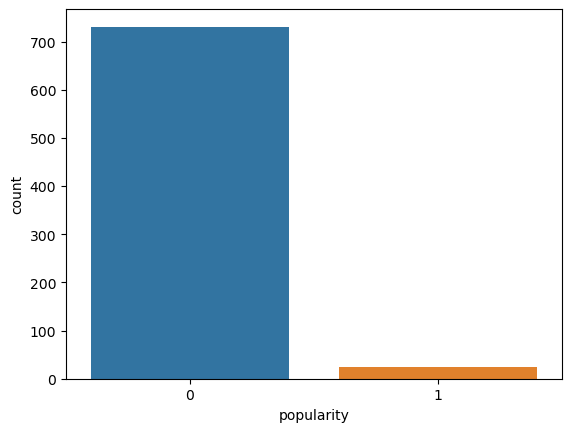

In [109]:
sns.countplot(x=dataset['popularity']);

In [110]:
dataset = dataset.drop(columns='url', axis=1)

In [111]:
dataset

,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,popularity
0,1,1,1,1,1,1,1,1,0
1,2,2,2,0,0,0,0,0,1
2,1,1,3,1,2,2,2,2,0
3,3,3,4,0,0,0,0,0,0
4,2,3,5,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1030,1,1,3,1,13,86,333,356,0
1031,2,5,165,0,0,0,0,0,0
1032,1,1,3,1,16,38,334,357,0
1033,28,3,166,32,0,0,0,0,0


In [112]:
X = dataset.drop('popularity', axis=1)
y = dataset['popularity']

In [113]:
X

,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,1,1,1,1,1,1,1,1
1,2,2,2,0,0,0,0,0
2,1,1,3,1,2,2,2,2
3,3,3,4,0,0,0,0,0
4,2,3,5,2,0,0,0,0
...,...,...,...,...,...,...,...,...
1030,1,1,3,1,13,86,333,356
1031,2,5,165,0,0,0,0,0
1032,1,1,3,1,16,38,334,357
1033,28,3,166,32,0,0,0,0


In [114]:
y

0       0
1       1
2       0
3       0
4       1
       ..
1030    0
1031    0
1032    0
1033    0
1034    0
Name: popularity, Length: 755, dtype: int64

In [115]:
# !pip install scikit-learn

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [118]:
from collections import Counter
print(f'Before Oversampling: {Counter(y_train)} ')

Before Oversampling: Counter({0: 585, 1: 19}) 


In [119]:
# !pip3 install imbalanced-learn --upgrade

In [120]:
from imblearn.over_sampling import SMOTE


In [121]:
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [122]:
print(f'After Oversampling: {Counter(y_train_smote)}')

After Oversampling: Counter({0: 585, 1: 585})


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

svc = SVC()
svc.fit(X_train_smote, y_train_smote)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_smote, y_train_smote)

rfc = RandomForestClassifier()
rfc.fit(X_train_smote, y_train_smote)

gbc = GradientBoostingClassifier()
gbc.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier()

In [124]:
y_pred1 = lr.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = svc.predict(X_test)
y_pred4 = dtc.predict(X_test)
y_pred5 = rfc.predict(X_test)
y_pred6 = gbc.predict(X_test)

In [125]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

print(f'ROC AUC for Logistic Regression {roc_auc_score(y_test, y_pred1)}')
print(f'ROC AUC for KNeighbors Classifier {roc_auc_score(y_test, y_pred2)}')
print(f'ROC AUC for SVC {roc_auc_score(y_test, y_pred3)}')
print(f'ROC AUC for Decision Tree Classifier {roc_auc_score(y_test, y_pred4)}')
print(f'ROC AUC for Random Forest Classifier {roc_auc_score(y_test, y_pred5)}')
print(f'ROC AUC for Gradient Boosting Classifier {roc_auc_score(y_test, y_pred6)}')

ROC AUC for Logistic Regression 0.6897260273972603
ROC AUC for KNeighbors Classifier 0.7863013698630137
ROC AUC for SVC 0.6212328767123287
ROC AUC for Decision Tree Classifier 0.6965753424657534
ROC AUC for Random Forest Classifier 0.6965753424657534
ROC AUC for Gradient Boosting Classifier 0.6965753424657534


In [126]:
print(f'ACC for Logistic Regression {accuracy_score(y_test, y_pred1)}')
print(f'ACC for KNeighbors Classifier {accuracy_score(y_test, y_pred2)}')
print(f'ACC for SVC {accuracy_score(y_test, y_pred3)}')
print(f'ACC for Decision Tree Classifier {accuracy_score(y_test, y_pred4)}')
print(f'ACC for Random Forest Classifier {accuracy_score(y_test, y_pred5)}')
print(f'ACC for Gradient Boosting Classifier {accuracy_score(y_test, y_pred6)}')

ACC for Logistic Regression 0.9602649006622517
ACC for KNeighbors Classifier 0.9602649006622517
ACC for SVC 0.8278145695364238
ACC for Decision Tree Classifier 0.9735099337748344
ACC for Random Forest Classifier 0.9735099337748344
ACC for Gradient Boosting Classifier 0.9735099337748344


In [127]:
ex1 = lr.predict([[2, 5, 336, 0, 0, 0, 0, 0]])

/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [128]:
if ex1 == 1:
    print('populer')
else:
    print('unpopuler')

unpopuler


In [129]:
ex2 = knn.predict([[2, 5, 336, 0, 0, 0, 0, 0]])
ex3 = svc.predict([[2, 5, 336, 0, 0, 0, 0, 0]])
ex4 = dtc.predict([[2, 5, 336, 0, 0, 0, 0, 0]])
ex5 = rfc.predict([[2, 5, 336, 0, 0, 0, 0, 0]])
ex6 = gbc.predict([[2, 5, 336, 0, 0, 0, 0, 0]])

/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoosting

In [130]:
print(ex2)
print(ex3)
print(ex4)
print(ex5)
print(ex6)

[0]
[0]
[0]
[0]
[0]


In [131]:
result = pd.DataFrame({'Models': ['LR', 'KNN', 'SVC', 'DTC', 'RFC', 'GBC'],
                      'AUC': [roc_auc_score(y_test, y_pred1) * 100,
                             roc_auc_score(y_test, y_pred2) * 100,
                             roc_auc_score(y_test, y_pred3) * 100,
                             roc_auc_score(y_test, y_pred4) * 100,
                             roc_auc_score(y_test, y_pred5) * 100,
                             roc_auc_score(y_test, y_pred6) * 100],
                      'ACC': [accuracy_score(y_test, y_pred1) * 100,
                             accuracy_score(y_test, y_pred2) * 100,
                             accuracy_score(y_test, y_pred3) * 100,
                             accuracy_score(y_test, y_pred4) * 100,
                             accuracy_score(y_test, y_pred5) * 100,
                             accuracy_score(y_test, y_pred6) * 100]})

In [132]:
result

,Models,AUC,ACC
0,LR,68.972603,96.026490
1,KNN,78.630137,96.026490
2,SVC,62.123288,82.781457
3,DTC,69.657534,97.350993
4,RFC,69.657534,97.350993
5,GBC,69.657534,97.350993


In [133]:
result.sort_values(by='AUC', ascending=False).index

Int64Index([1, 3, 4, 5, 0, 2], dtype='int64')

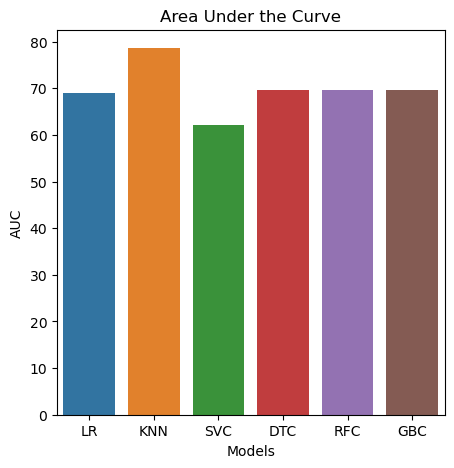

In [134]:
plt.figure(figsize=(5, 5))

sns.barplot(x=result['Models'], y=result['AUC'])

plt.title('Area Under the Curve')

plt.show()

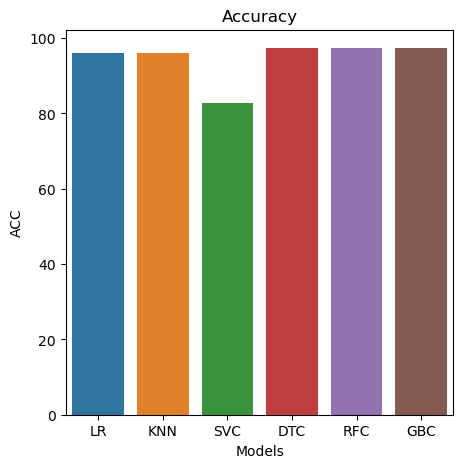

In [135]:
plt.figure(figsize=(5, 5))

sns.barplot(x=result['Models'], y=result['ACC'])

plt.title('Accuracy')

plt.show()

In [136]:
import joblib

In [137]:
# joblib.dump(lr, 'wikipedia_classification')

In [138]:
# model_lr = joblib.load('./wikipedia_classification')

In [139]:
# model_lr.predict([[2, 5, 336, 0, 0, 0, 0, 0]])

In [140]:
# !pip install streamlit
# !pip install networkx

In [141]:
dataset.head()

,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,popularity
0,1,1,1,1,1,1,1,1,0
1,2,2,2,0,0,0,0,0,1
2,1,1,3,1,2,2,2,2,0
3,3,3,4,0,0,0,0,0,0
4,2,3,5,2,0,0,0,0,1


In [142]:
# trace_data = dataset.loc[:,:'prefix_8']

In [144]:
# trace_data.to_csv('./dataset/trace_data.csv', index=False)

In [145]:
trace_data = pd.read_csv('./dataset/trace_data.csv')
trace_data.head()

,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,1,1,1,1,1,1,1,1
1,2,2,2,0,0,0,0,0
2,1,1,3,1,2,2,2,2
3,3,3,4,0,0,0,0,0
4,2,3,5,2,0,0,0,0


In [146]:
trace_data.shape

(755, 8)